DATA620 Week Eight - Assignment High Frequency Words
Ivan Tikhonov

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

1.Choosing a corpus of interest.
I went an easy way, selecting one of the corpus from the freely available Gutenburg library that can be downloaded from the NLTK package.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ivant\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [20]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [21]:
austen = nltk.Text(nltk.corpus.gutenberg.words('austen-persuasion.txt'))

2.Total Unique Words.
How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
I can count all 'words' by taking the lenth of our corpus...

In [22]:
AW=len(austen)
AW

98171

But this counts every word even if it is a duplicate. I can remove duplicates by wrapping our corpus in the set function in python. Let's do that and then sort the results to see what I get...

In [23]:
print(*sorted(set(austen))[:100], sep = "   ")


!   !"   !'   !--   "   &   '   '.   (   )   ),   ).   );   ,   ,"   ,"--   ,"--"   ,'   ,)   ,)--   ,--   ,--`   -   --   --!   --"   --(   ---   ---.   --;   .   ."   .'   .'"   .)   .,   .--   .--,   .--,"   1   10   11   12   13   14   15   16   17   1760   1784   1785   1787   1789   1791   18   1800   1803   1806   1810   1814   1818   19   1st   2   20   21   22   23   24   29th   3   4   5   6   7   8   9   :   :"   :--   :--"   ;   ;"   ;'   ;)   ;--   ;--"   ?   ?"   ?'   ?'"   ?)   ?),   A   About   Abydos   Accordingly   Admiral   Admiralty   After


The first almost 100 words are not even words!

'Unique' words
Looking at the sample of our words above we can see that it includes punctuation and numbers as well as words. I also know that python will see capital letters as distinct from lowercase letters, so I need to convert all words to lowercase and remove punctuation and numbers to get only the unique words.

I modified some code from the textbook to exclude punctuation and numbers and remove capitalization.

In [24]:
# create list of all words including duplicates, but excluding punctuation, numbers and capitalization
AWwoNP = [word.lower() for word in austen if word.isalpha()]

# print
print(*AWwoNP[:100], sep = "   ")

persuasion   by   jane   austen   chapter   sir   walter   elliot   of   kellynch   hall   in   somersetshire   was   a   man   who   for   his   own   amusement   never   took   up   any   book   but   the   baronetage   there   he   found   occupation   for   an   idle   hour   and   consolation   in   a   distressed   one   there   his   faculties   were   roused   into   admiration   and   respect   by   contemplating   the   limited   remnant   of   the   earliest   patents   there   any   unwelcome   sensations   arising   from   domestic   affairs   changed   naturally   into   pity   and   contempt   as   he   turned   over   the   almost   endless   creations   of   the   last   century   and   there   if   every   other   leaf   were   powerless   he   could   read   his   own


In [25]:
# take the length of the set of those words to find the number of unique words
len(set(AWwoNP))

5739

By taking the length of the set of words after I removed punctuation, numbers and capitalization I find that we have 5,739 'unique' words in our corpus.

3.How many unique words represent half of all words.
Taking the most common words, how many unique words represent half of the total words in the corpus?
I can create a frequency distribution of the list of all words excluding numbers, punctuation and capitalization to get a count for each unique word in the corpus. Using that frequency distribution I can write a function to add the frequency counts of the most frequent words one by one (in order from most frequent to least) until their total count reaches at least half the total word count for the entire corpus and keep a running tally of how many word frequencies were added together to get the number of words that represent half of the total words.

In [26]:
fdist = nltk.FreqDist(AWwoNP)
fdist

FreqDist({'the': 3329, 'to': 2808, 'and': 2801, 'of': 2570, 'a': 1595, 'in': 1389, 'was': 1337, 'her': 1204, 'had': 1186, 'she': 1146, ...})

In [27]:
tw=len(AWwoNP)
tcount=0
wcount=0
for word, count in fdist.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(tw/2):
        print(wcount)
        break

58


The following 58 unique words represent half of the total words in the corpus.

In [28]:
print(*[w for w,n in fdist.most_common()[:58]], sep = ", ")

the, to, and, of, a, in, was, her, had, she, i, it, he, be, not, that, as, for, but, his, with, you, have, at, all, anne, been, s, him, could, very, they, were, by, which, is, on, so, no, would, captain, from, their, mrs, elliot, there, or, more, them, mr, this, an, than, one, must, when, my, being


I can double check this by plotting a cumulative frequency plot for the first 58 words and comparing the cumulative count to half the total word count tw.

In [29]:
tw/2

42060.5

The cumulative word count for the first 58 words in the plot below matches pretty well to the expected value of 42,060.

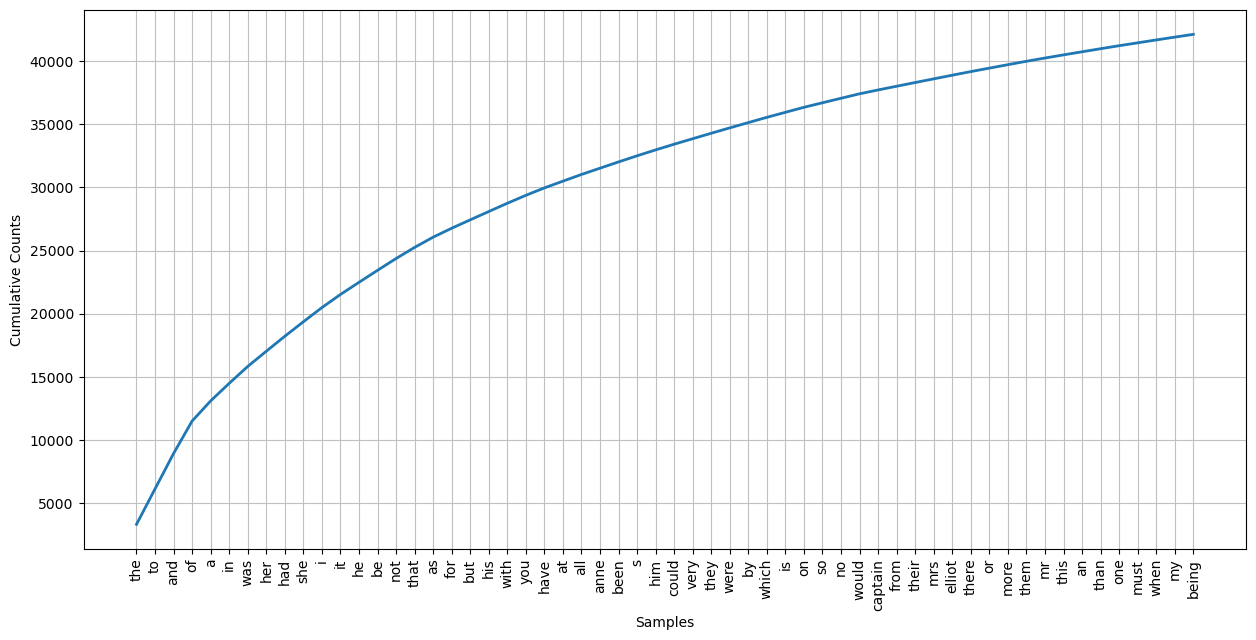

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [30]:
plt.figure(figsize=(15,7))
fdist.plot(58, cumulative = True)

4.200 most frequent words.
Identify the 200 highest frequency words in this corpus.

In [31]:
wlist = []
for i in range(0, 200, 25):
    df = pd.DataFrame(fdist.most_common()[i:(i+25)])
    df.columns=['word', 'count']
    wlist.append(df)

pd.concat(wlist, axis=1)

,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count
0,the,3329,anne,497,this,250,might,166,how,125,out,95,family,80,back,69
1,to,2808,been,496,an,245,own,163,miss,125,house,94,felt,80,off,69
2,and,2801,s,485,than,243,well,163,your,124,say,93,give,79,admiral,69
3,of,2570,him,467,one,238,did,162,most,123,seemed,93,away,78,came,68
4,a,1595,could,451,must,228,herself,159,see,123,having,92,way,78,smith,68
5,in,1389,very,434,when,228,now,158,soon,122,up,91,ever,78,woman,67
6,was,1337,they,433,my,223,never,155,though,117,thought,90,uppercross,77,lyme,67
7,her,1204,were,426,being,220,we,155,father,117,elizabeth,89,day,77,just,66
8,had,1186,by,418,only,219,time,152,before,116,however,89,come,75,another,66
9,she,1146,which,416,wentworth,218,sir,149,two,114,last,88,feelings,75,clay,66


5.Relative frequency of these 200 words.
Create a graph that shows the relative frequency of these 200 words.
Unfortunately, the default NLTK plot for frequency distributions does not actually plot the relative frequency but plots the actual counts...

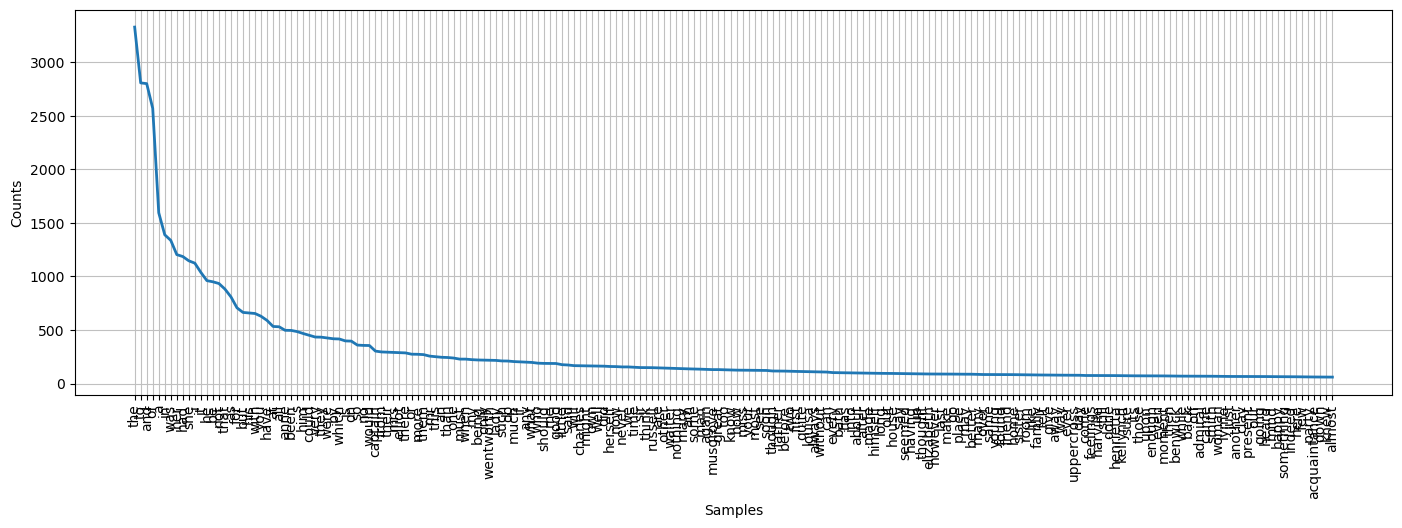

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
plt.figure(figsize=(17,5))
fdist.plot(200, )

So I wrote a function to plot the relative frequencies...

In [33]:
my_dict = {}
wcount=0
for word, count in fdist.most_common():       
    wcount=wcount+1
    my_dict[word]=count/tw
    if wcount>199:
        break

<BarContainer object of 200 artists>

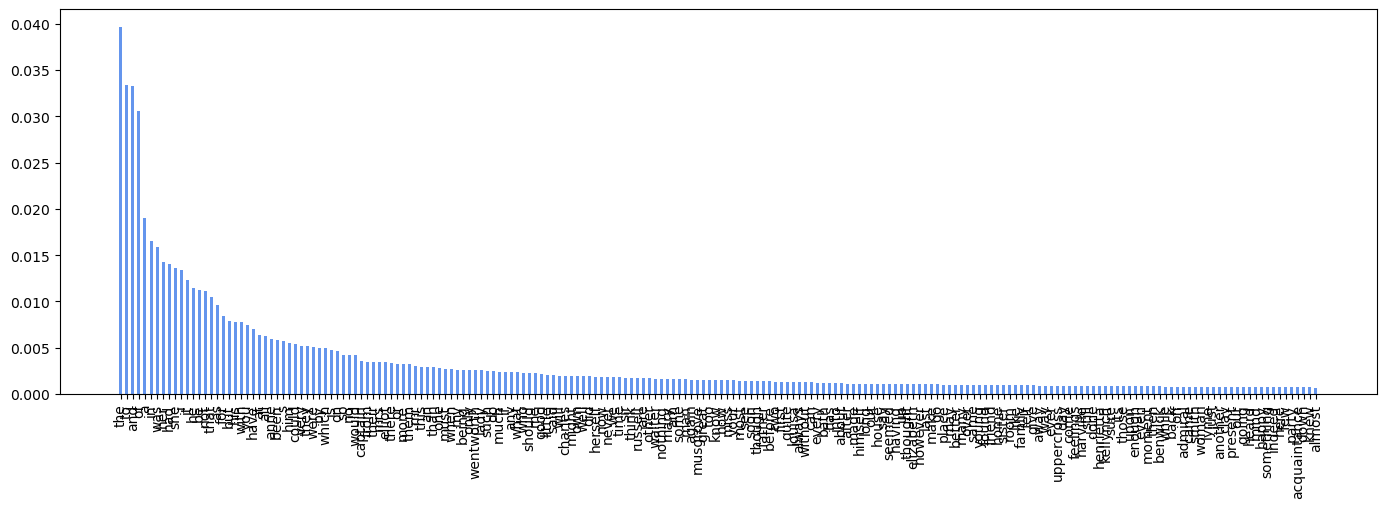

In [34]:
plt.figure(figsize=(17,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=4)
plt.bar(my_dict.keys(), my_dict.values(), width=.5, color='cornflowerblue')

6.Zipf's law
Does the observed relative frequency of these words follow Zipf’s law? Explain.
From Wikipedia:

Zipf's law was originally formulated in terms of quantitative linguistics , stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word the is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word of accounts for slightly over 3.5% of words (36,411 occurrences), followed by and (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.[1]

[1] (https://en.wikipedia.org/wiki/Zipf%27s_law)

Let's see if the actual counts of each word are equal to the expected counts of each word according to Zipf's Law. First I can write a function to calculate the expected counts then I can concatenate that in a dataframe with the actual counts and the difference and percent difference for each word.

In [35]:
mostf = fdist.most_common()[0][1]
expected_counts = []
rank = 0
for i in range(len(fdist)):
    rank += 1
    expected_counts.append(round(mostf * (1/rank)))

expected_counts

zipfs_df = pd.DataFrame(fdist.most_common())
zipfs_df.columns=['Word', 'Actual count']
#pd.concat(zipfs_df, axis=1)
zipfs_df["Zipf's Expected Count"] = expected_counts
zipfs_df['Difference'] = zipfs_df['Actual count'] - zipfs_df["Zipf's Expected Count"]
zipfs_df['Percent Difference'] = round(((zipfs_df['Actual count'] / zipfs_df["Zipf's Expected Count"])
                                        - 1) *100).astype(int)
zipfs_df.head(30)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
0,the,3329,3329,0,0
1,to,2808,1664,1144,69
2,and,2801,1110,1691,152
3,of,2570,832,1738,209
4,a,1595,666,929,139
5,in,1389,555,834,150
6,was,1337,476,861,181
7,her,1204,416,788,189
8,had,1186,370,816,221
9,she,1146,333,813,244


I can see in the data above that the actual counts are consistenetly far above the expected counts and by the 13th word the actual counts rise to about 300% above the expected count and remain consistently there for at least the first 30 words. Let's jump to the 500th word to see if the counts are still consistently higher.

At around 500 words into the frequency distribution the actual counts are still around 200% higher than would be expected with Zipf's Law.

In [36]:
zipfs_df[505:515]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
505,air,20,7,13,186
506,call,20,7,13,186
507,pleased,20,7,13,186
508,why,20,7,13,186
509,appeared,20,7,13,186
510,concert,20,7,13,186
511,took,19,7,12,171
512,handsome,19,6,13,217
513,delighted,19,6,13,217
514,conduct,19,6,13,217


At about half way through the frequency distribution the counts are still about 100% higher than would be expected.

In [37]:
zipfs_df[2500:2505]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
2500,sensibly,2,1,1,100
2501,discredit,2,1,1,100
2502,lesser,2,1,1,100
2503,occasions,2,1,1,100
2504,unequal,2,1,1,100


Not until the tail of the distribution do the actual and expected counts match.

In [38]:
zipfs_df.tail(5)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
5734,defiance,1,1,0,0
5735,accessions,1,1,0,0
5736,sunshine,1,1,0,0
5737,national,1,1,0,0
5738,finis,1,1,0,0


Let's plot the expected counts and actual counts to visualize the entire distribution.

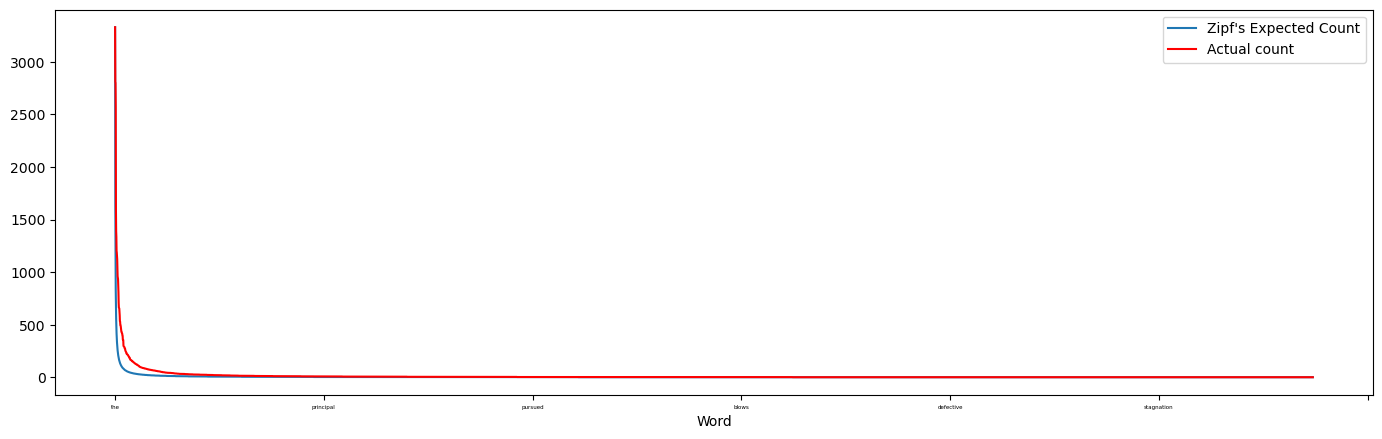

In [39]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df.plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df.plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

Looking at the plot above it looks like the observed relative frequency of these words does follow Zipf’s law in a broad sense, in that the shape of the plots are similar, however, when I zoom in on the first 150 words as is shown in the second plot below, you can see that there's actually quite a bit of difference in the relative frequencies.

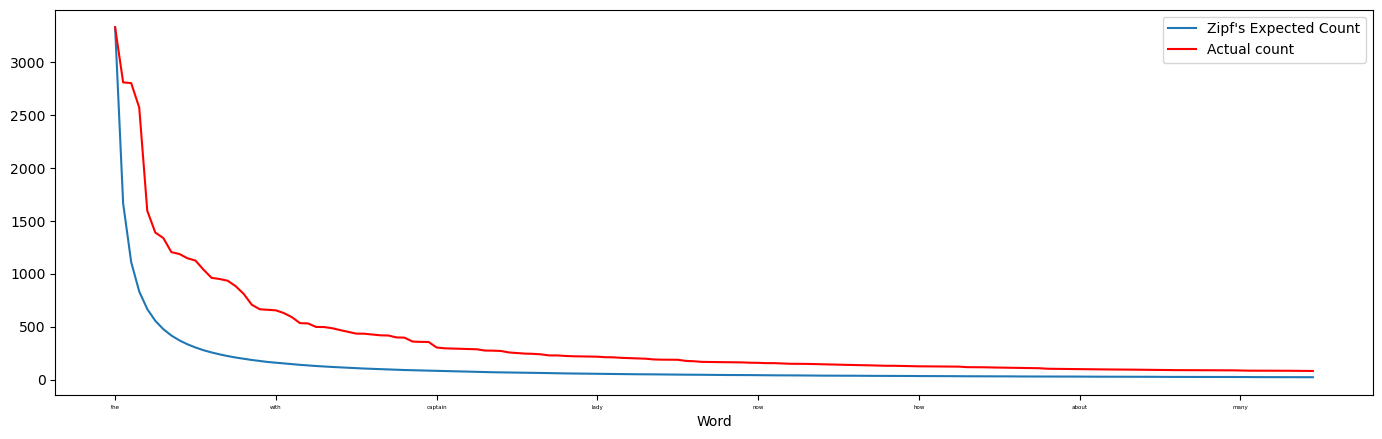

In [40]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df[:150].plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df[:150].plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

7.Compare with 'all words in all corpora'
In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”
I are going to use Wikipedia's list of the most common words in the English language as our gauge for "all words in all corpora". I can import the list of the first 100 most frequently used English words from Wikipedia.

In [41]:
mc_english_words = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English#100_most_common_words', 
                 header=0, index_col=None)
mc_english_words = mc_english_words[0]
mc_english_words['Word'] = mc_english_words['Word'].str.lower()
mc_english_words

,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,the,Article,1,1,Pre-primer,12
1,be,Verb,2,2,Primer,21
2,to,Preposition,3,"7, 9",Pre-primer,17
3,of,Preposition,4,4,Grade 1,12
4,and,Conjunction,5,3,Pre-primer,16
...,...,...,...,...,...,...
95,these,Pronoun,96,82,NaN,2
96,give,Verb,97,98,NaN,19
97,day,Noun,98,90,NaN,9
98,most,Adverb,99,"144, 187",NaN,12


Next I can make a dataframe of just the first 100 most frequently used words in the Jane Austen text so that I can compare the two lists. The Wikipedia list already has a rank in the OEC rank column, and I can use the index plus one to create a rank column for the Jane Austen data.

In [42]:
austen_100 = pd.DataFrame(fdist.most_common()[:100], columns=['Austen_Word', 'Austen_Frequency'])
austen_100['Austen_Rank'] = austen_100.index +1
austen_100

,Austen_Word,Austen_Frequency,Austen_Rank
0,the,3329,1
1,to,2808,2
2,and,2801,3
3,of,2570,4
4,a,1595,5
...,...,...,...
95,again,132,96
96,musgrove,130,97
97,great,130,98
98,too,128,99


Finally I can merge the data from the two lists using the word columns as a key to see where they match up and where they are different.

In [43]:
pd.set_option('display.max_rows', 500)
words_merged = pd.merge(austen_100,mc_english_words,left_on='Austen_Word',right_on='Word',how='outer')
top_100 = words_merged.fillna('')
top_100

,Austen_Word,Austen_Frequency,Austen_Rank,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,the,3329.0,1.0,the,Article,1,1,Pre-primer,12.0
1,to,2808.0,2.0,to,Preposition,3,"7, 9",Pre-primer,17.0
2,and,2801.0,3.0,and,Conjunction,5,3,Pre-primer,16.0
3,of,2570.0,4.0,of,Preposition,4,4,Grade 1,12.0
4,a,1595.0,5.0,a,Article,6,5,Pre-primer,20.0
5,in,1389.0,6.0,in,Preposition,7,"6, 128, 3038",Pre-primer,23.0
6,was,1337.0,7.0,,,,,,
7,her,1204.0,8.0,her,Possessive pronoun,"29, 106",42,Grade 1,3.0
8,had,1186.0,9.0,,,,,,
9,she,1146.0,10.0,she,Pronoun,30,31,Primer,7.0


I can see that 40 words don't match up since our merged dataframe now contains 140 rows rather than just 100. Looking at the OEC rank column I can see that the majority of the first 41 most frequent words from both lists matched. Only one word, 'say', ranked 28 in the Wikipedia list is not matched up with a word from the Austen corpus. All the other remaining 40 Wikipedia words (indexes 100 through 139) that do not exist in the Austen list are ranked 42 or higher.

Words that are in both the Austen 100 most frequently used words and the Wikipedia top 100 most frequently used English words list

In [44]:
matched_words = words_merged[['Austen_Word','Austen_Rank','Word','OEC rank']].dropna()
matched_words['Austen_Rank'] = matched_words['Austen_Rank'].astype(int)
matched_words.reset_index(inplace=True)
matched_words

,index,Austen_Word,Austen_Rank,Word,OEC rank
0,0,the,1,the,1
1,1,to,2,to,3
2,2,and,3,and,5
3,3,of,4,of,4
4,4,a,5,a,6
5,5,in,6,in,7
6,7,her,8,her,"29, 106"
7,9,she,10,she,30
8,10,i,11,i,10
9,11,it,12,it,11


In [45]:
len(matched_words)

60

60 of the words most frequently used in the Austen text also appear in the top 100 most frequently used words in the English language. This is not suprising since the list includes many words that are not necessarily meaningful to the story, but are words like, 'the', 'and', 'to', 'of', 'a', and 'in'.

Words in either the Austen 100 most frequently used words or the Wikipedia top 100 most frequently used English words list but not both

In [46]:
unmatched_words = top_100[['Austen_Word','Austen_Rank','Word','OEC rank']]
unmatched_words = unmatched_words[(unmatched_words['Austen_Word']=='') | (unmatched_words['Word']=='')]
unmatched_words.reset_index(inplace=True)
unmatched_words

,index,Austen_Word,Austen_Rank,Word,OEC rank
0,6,was,7.0,,
1,8,had,9.0,,
2,25,anne,26.0,,
3,26,been,27.0,,
4,27,s,28.0,,
5,30,very,31.0,,
6,32,were,33.0,,
7,35,is,36.0,,
8,40,captain,41.0,,
9,43,mrs,44.0,,


I can see in the list above that many of the words that are used frequently in the Asten text that are not in the Wikipedia list are words that may be specific to the story I are analyzing and so I wouldn't expect them to be as frequently used outside of that context. For example, titles and proper names (Anne, captain, Charles, Wentworth, and Russell) and words like 'lady', 'sir', and 'muskgrove' are frequently used by Austen, but I wouldn't expect them to be as frequently used in general.